# Enunciado

Determine la salida del siguiente sistema LTI (ESA):

$ Y(n) = \dfrac{X(n)+X(n-1)}{2} $

donde $X$ es ruido blanco de media $\mu_X = 0$ y covarianza $\sigma_{X}^{2}$. Sabemos que $X$ es ESA:

1. Determine si $Y(n)$ es ESA también.
2. Determine $S_Y(\omega)$ de manera analítica.
3. Estime el periodograma.
4. Compare el periodograma original de $X$ y el de $Y$, estimado y teórico.


# Resolución

## 1. Determine si $y(n)$ es ESA también.

Para saber si la salida del sistema es ESA también, se debe evaluar el valor esperado y la autocorrelación de $Y(n)$. El valor esperado debe ser una constante y el valor de la autocorrelación debe depender únicamente del atraso $k$ y no del tiempo $n$.

### Valor esperado de la salida

\begin{equation}
\begin{split}
E[y(n)] &= E[\dfrac{1}{2} x(n) + \dfrac{1}{2} x(n-1)] \\
 &= \dfrac{1}{2} E[x(n)] + \dfrac{1}{2} E[x(n-1)] \\
 &= \dfrac{1}{2} \mu_x + \dfrac{1}{2} \mu_x \\
 &= \mu_x
\end{split}
\end{equation}

El resultado anterior cumple con la primera condición de ser constante, en este caso es igual a la media del ruido blanco usado como entrada.

### Valor esperado de la auto-correlación

Como premisa se espera demostrar que el valor esperado de la autocorrelación sólo dependa de $k$, para demostrar que es un proceso ESA.

\begin{equation}
\begin{split}
R_Y(n, k) &= E[y(n) y(n+k)] \\
 &= E[\dfrac{x(n) + x(n-1)}{2} \, \dfrac{x(n+k) + x(n-1+k)}{2}] \\
 &= \dfrac{1}{4} \left\{ x(n) x(n+k) \, + \, x(n) x(n-1+k) \, + \, x(n-1) x(n+k) \, + \, x(n-1) x(n-1+k) \right\} \\
 &= \dfrac{1}{4} \left\{ E[x(n) x(n+k)] \, + \, E[x(n) x(n+(k-1))] \, + \, E[x(n-1) x(n-1+1+k)] \, + \, E[x(n-1) x(n-1+k)] \right\} \\
 &= \dfrac{1}{4} \left\{ E[x(n) x(n+k)] \, + \, E[x(n) x(n+(k-1))] \, + \, E[x(n-1) x(n-1+(k+1))] \, + \, E[x(n-1) x(n-1+k)] \right\} \\
 &= \dfrac{1}{4} \left\{ R_{yy}(k) \, + \, R_{yy}(k-1) \, + \, R_{yy}(k+1) \, + \, R_{yy}(k) \right\}
\end{split}
\end{equation}

<b>Se comprobó que la autocorrelación sólo depende de $k$</b>


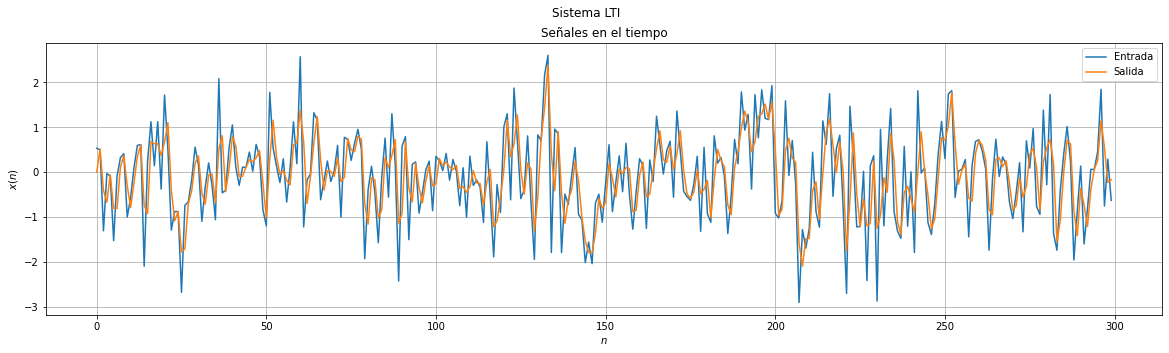

In [ ]:
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt

# Definición de la señal de entrada
media = 0
sigma2_x = 1
dev_std = np.sqrt(sigma2_x)
N = 300
X_n = np.random.normal(media, dev_std, size=N)
# X_n = np.random.randn(1, N)[0]

# Sistema LTI
Y_n = np.zeros_like(X_n, dtype='float64')
for n in range(1, N):
  Y_n[n] = 0.5 * X_n[n] + 0.5 * X_n[n - 1]

# Graficamos
n = np.arange(N)
fig, axs = plt.subplots(figsize=(20, 5))
fig.suptitle('Sistema LTI')
axs.plot(n, X_n, n, Y_n)
axs.set_title('Señales en el tiempo')
axs.set_ylabel('$x(n)$')
axs.set_xlabel('$n$')
axs.grid(True)
axs.legend(['Entrada', 'Salida']);

plt.show()

## 2. Determine $S_y(\omega)$ de manera analítica.

Sabiendo que:

\begin{equation}
S_y(\omega) = |H(\omega)|^2 \, S_x(\omega) = H(\omega) \, H^{*}(\omega) \, S_x(\omega)
\end{equation}

entonces, para determinar $H(\omega)$ se obtiene $H(z)$ y luego se evalúa $z=e^{j\omega}$ y para obtener $H^{*}(\omega)$ se evalúa $z=e^{-j\omega}$.

### Determinación de la función de transferencia de la planta

La Transformada $Z$ de $y(n)$ es:
\begin{equation}
Y(z) = \dfrac{1}{2} X(z) + \dfrac{1}{2} z^{-1} X(z)
\end{equation}

La función de transferencia del sistema es 
\begin{equation}
H(z) = \dfrac{Y(z)}{X(z)} = \dfrac{1+ z^{-1}}{2} = \dfrac{1}{2} \dfrac{z + 1}{z}
\end{equation}

### Cálculo de $S_Y(\omega)$

\begin{equation}
\begin{split}
H(\omega) &= \left. H(z) \right |_{z=e^{j\omega}} = \left. \dfrac{1+ z^{-1}}{2} \right |_{z=e^{j\omega}} = \dfrac{1+ e^{-j\omega}}{2} = \dfrac{e^{-j\omega/2} (e^{j\omega/2}  + e^{-j\omega/2})}{2} \\
&= Cos \left( \dfrac{\omega}{2} \right) \, e^{-j\omega/2}
\end{split}
\end{equation}

y

\begin{equation}
\begin{split}
H^*(\omega) &= \left. H(z) \right |_{z=e^{-j\omega}} = \left. \dfrac{1+ z^{-1}}{2} \right |_{z=e^{-j\omega}} = \dfrac{1+ e^{j\omega}}{2} = \dfrac{e^{j\omega/2} (e^{-j\omega/2}  + e^{j\omega/2})}{2} \\
&= Cos \left( \dfrac{\omega}{2} \right) \, e^{j\omega/2}
\end{split}
\end{equation}

Según el desarrollo anterior:
\begin{equation}
S_y(\omega) = Cos^2 \left( \dfrac{\omega}{2} \right) \, S_x(\omega)
\end{equation}

Finalmente, como:
\begin{equation}
S_x(\omega) = \sigma^{2}_{x}
\end{equation}

Entonces:
\begin{equation}
S_y(\omega) = \sigma^{2}_{x} \, Cos^2 \left( \dfrac{\omega}{2} \right)
\end{equation}


## 3. Estime el periodograma de $Y(n)$

\begin{equation}
\widehat{S}_Y(e^{j \omega}) = \dfrac{1}{N} Y_N(e^{-j \omega}) Y^{*}_{N}(e^{j \omega}) = \dfrac{1}{N} | Y_N (e^{j \omega}) |^{2}
\end{equation}

Varianza de S_y estimado: 0.4878308101530935


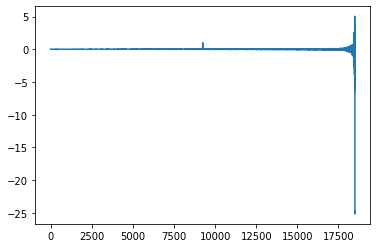

In [ ]:
from numpy.fft import fft, ifft

# Periodograma para la entrada
X_w = fft(X_n)
S_X_hat = (1/N) * np.abs(X_w)**2
# Periodograma teórico para la entrada
S_X_teorico = sigma2_x*np.ones((1, N)).flatten()

# Periodograma para la salida
Y_w = fft(Y_n)
S_Y_hat = (1/N) * np.abs(Y_w)**2
# Periodograma teórico para la salida
# Defino un rango de la frecuencia de muestreo angular para poder graficar.
# NOTA: No perder de vista que para la FFT, 2PI radianes se corresponden con las
#       N muestras
omega_s = np.linspace(0, 2*np.pi, N)
S_Y_teorico = sigma2_x*np.cos(omega_s/2)**2
# Varianza del periodograma estimado de la salida
var_S_Y_hat = np.var(S_Y_hat)
print("Varianza de S_y estimado: {}".format(var_S_Y_hat))


# Correlograma
Suma_Correlacion_Y = np.correlate(Y_n, Y_n, "same")
# Autocorrelacion Sesgada
R_Y_hat_sesgado = Suma_Correlacion_Y/N
Correlograma_Y_sesgado = fft(R_Y_hat_sesgado)
# Autocorrelacion Insesgada
c_w = np.zeros(N, dtype="float64")
for n,K2 in enumerate(range(0, N)):
  c_w[K2] = 1/(N-K2)
R_Y_hat_insesgado = c_w * Suma_Correlacion_Y

Correlograma_Y_insesgado = fft(R_Y_hat_insesgado)
# Grafico Autocorrelaciones
plt.figure()
plt.plot(R_Y_hat_insesgado)


## 4. Compare el periodograma original de $X$ y el de $Y$, estimado y teórico.


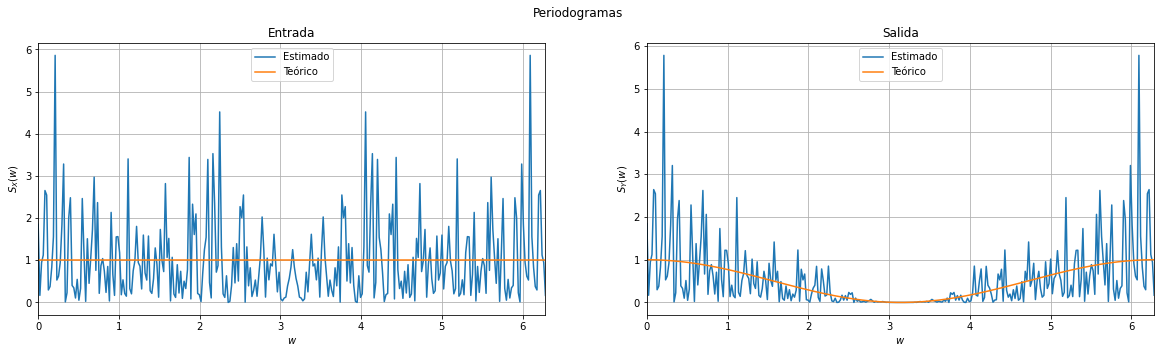

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('Periodogramas')
axs[0].plot(omega_s, S_X_hat, omega_s, S_X_teorico)
axs[0].set_title('Entrada')
axs[0].set_ylabel('$S_X(w)$')
axs[0].set_xlabel('$w$')
axs[0].set_xlim(0, 2*np.pi)
axs[0].grid(True)
axs[0].legend(['Estimado', 'Teórico'])
#
axs[1].plot(omega_s, S_Y_hat, omega_s, S_Y_teorico)
axs[1].set_title('Salida')
axs[1].set_ylabel('$S_Y(w)$')
axs[1].set_xlabel('$w$')
axs[1].set_xlim(0, 2*np.pi)
axs[1].grid(True)
axs[1].legend(['Estimado', 'Teórico']);

plt.show()

# Adicionales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f49ff4e10e0> (for post_execute):


KeyboardInterrupt: ignored

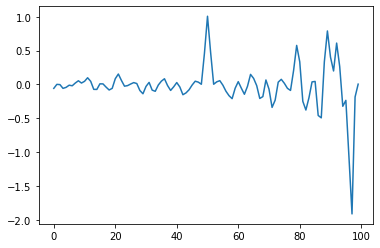

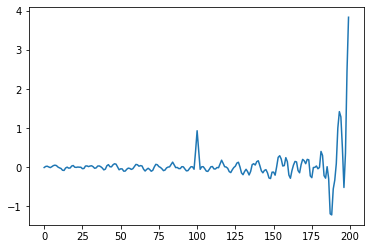

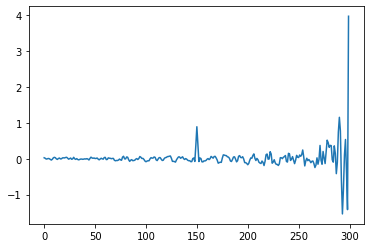

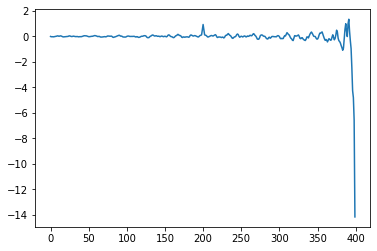

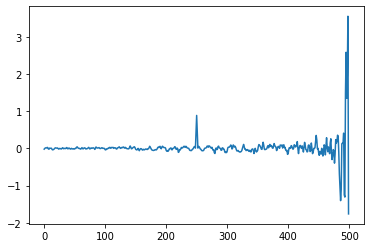

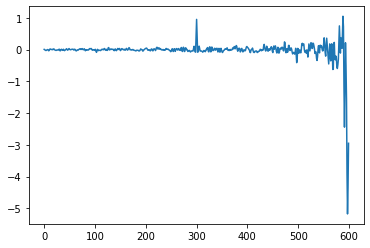

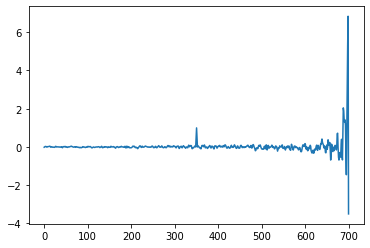

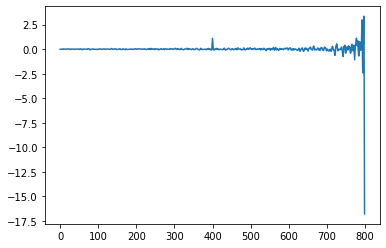

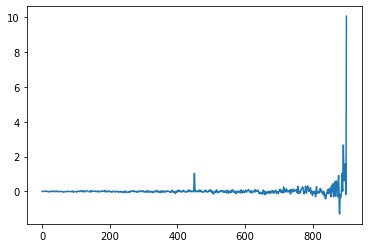

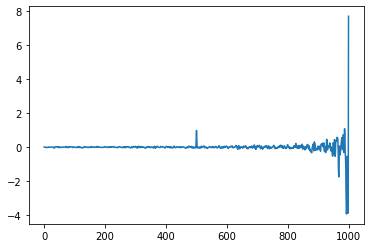

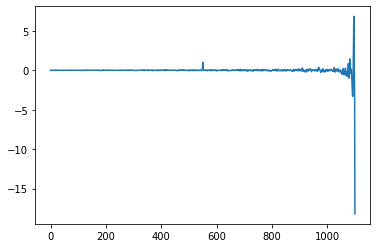

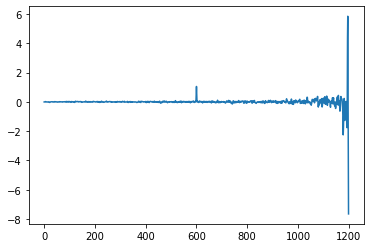

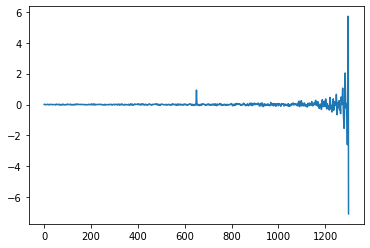

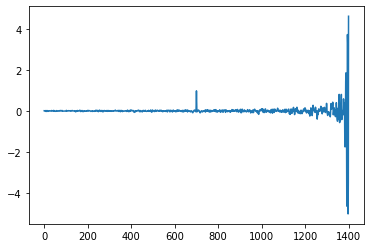

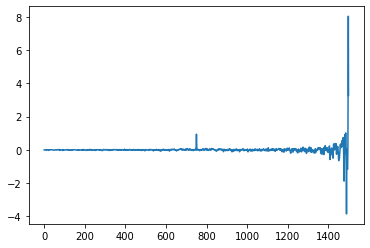

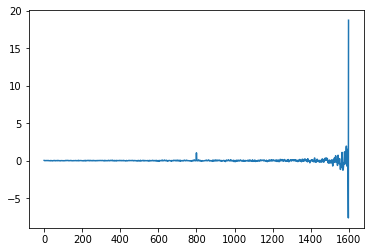

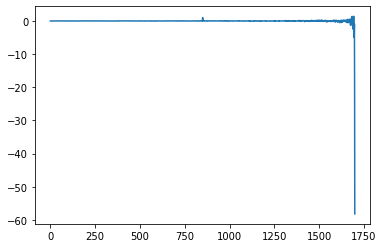

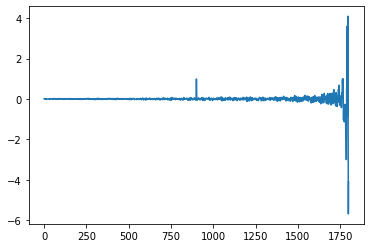

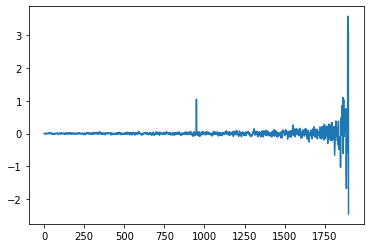

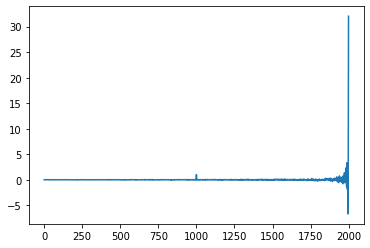

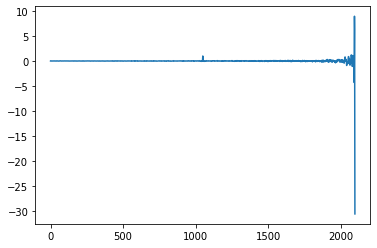

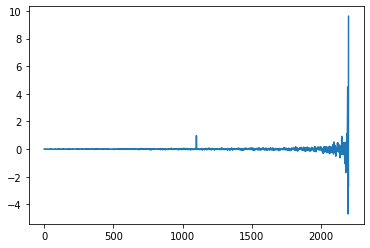

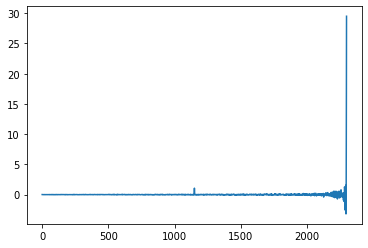

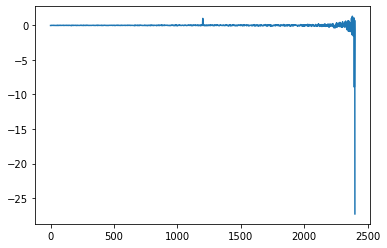

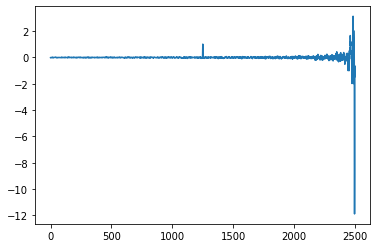

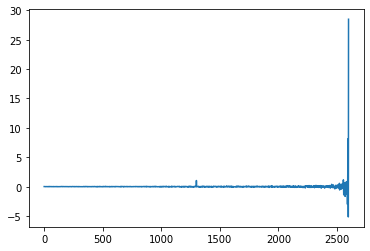

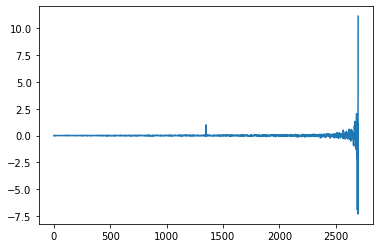

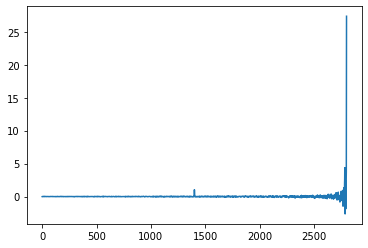

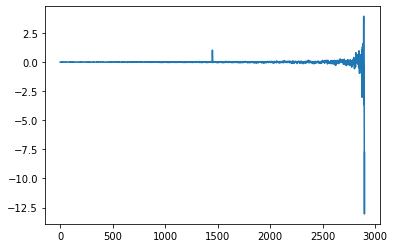

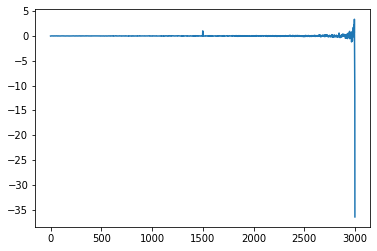

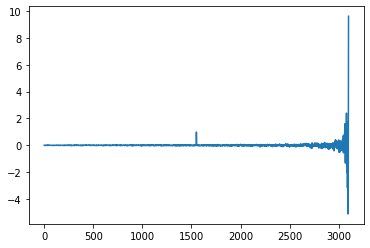

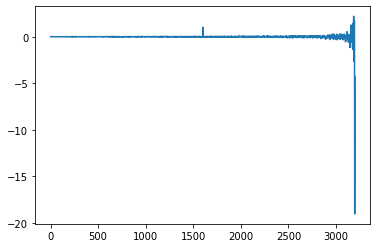

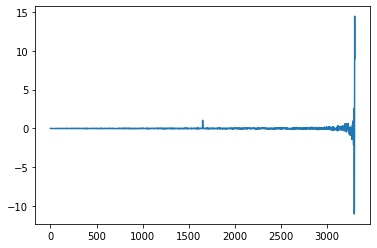

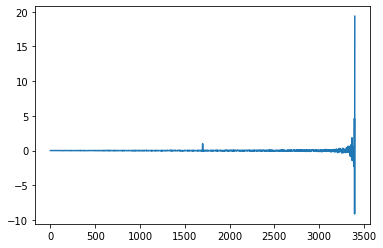

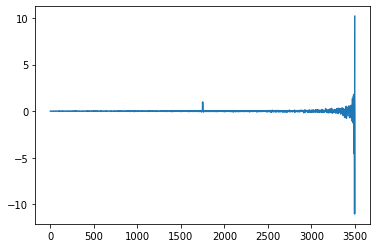

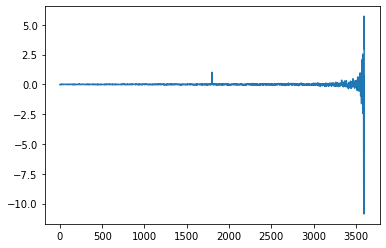

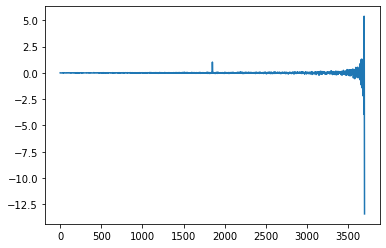

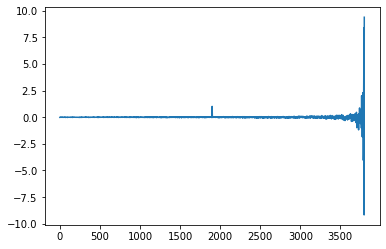

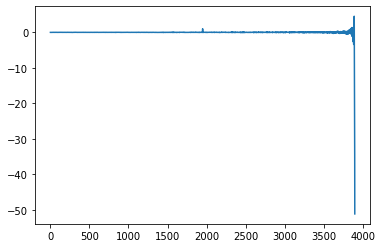

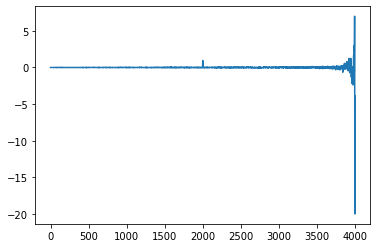

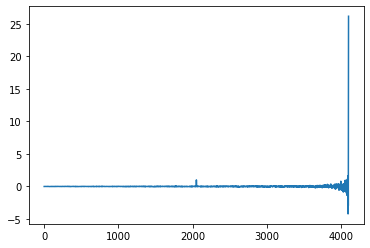

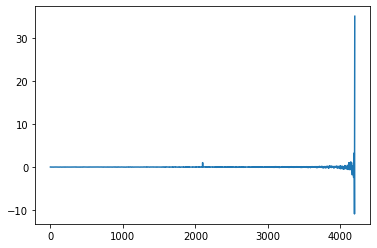

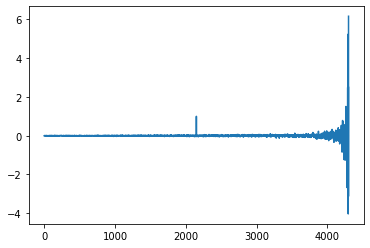

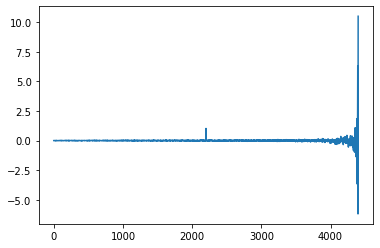

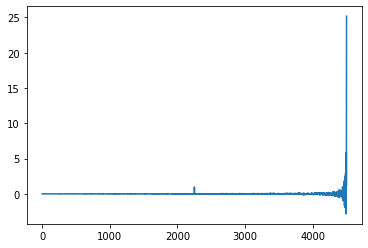

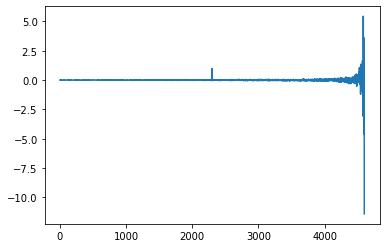

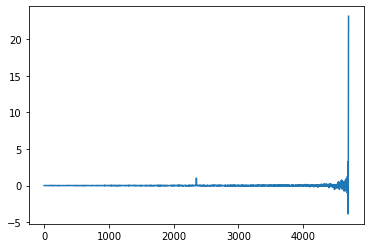

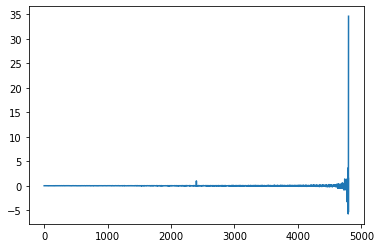

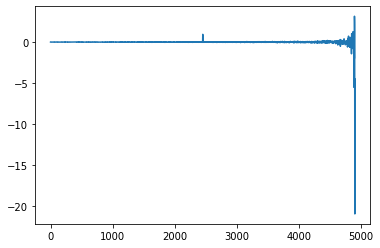

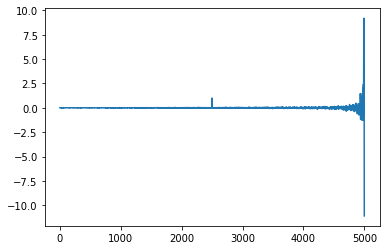

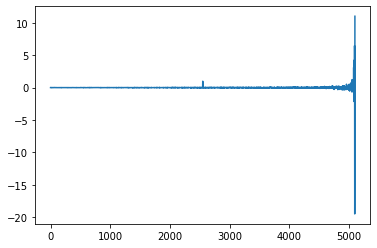

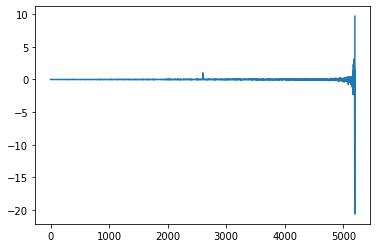

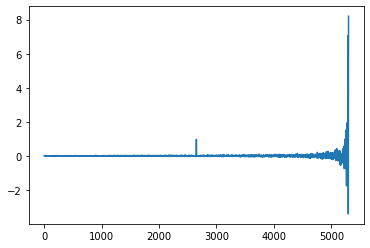

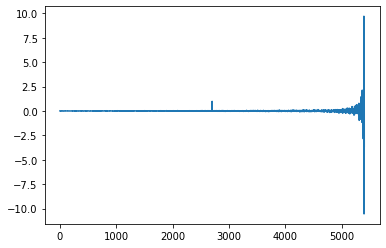

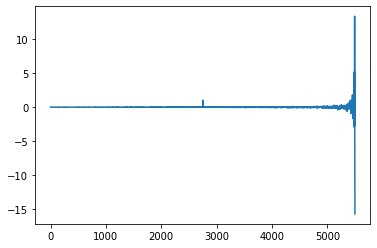

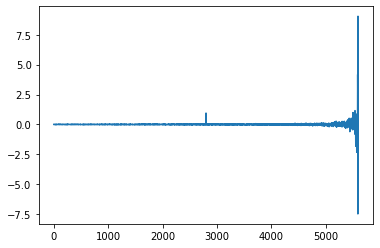

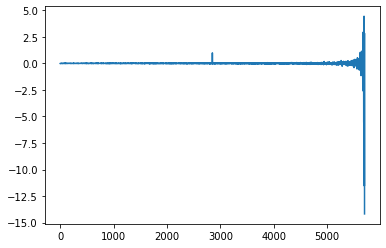

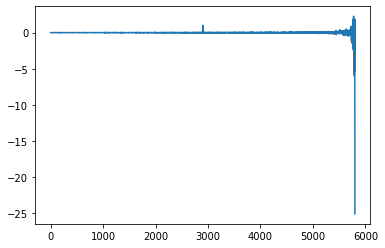

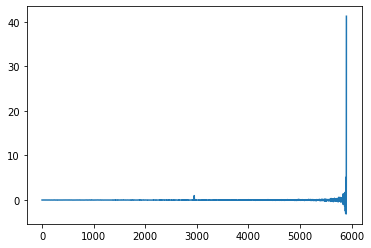

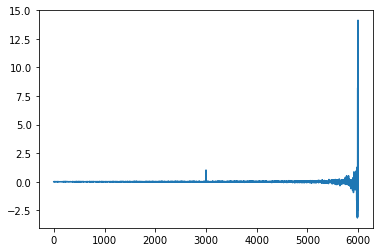

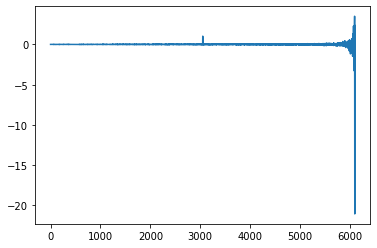

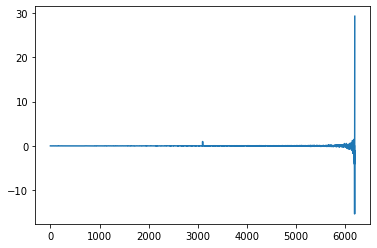

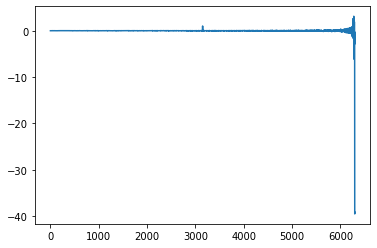

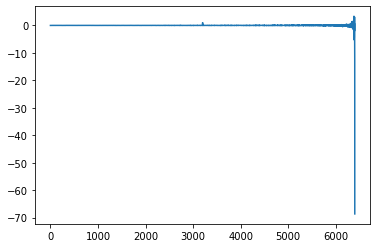

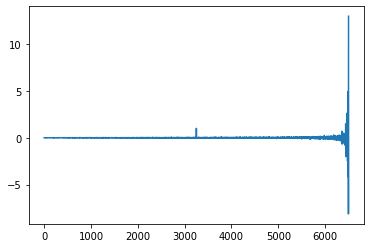

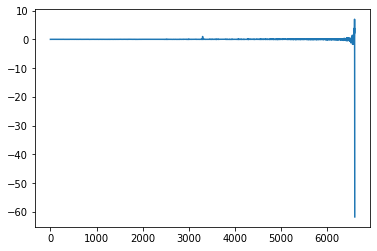

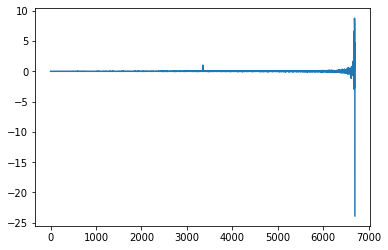

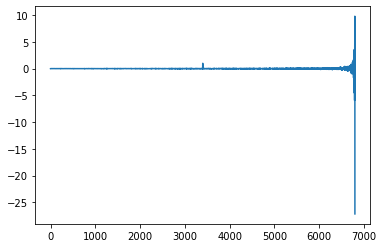

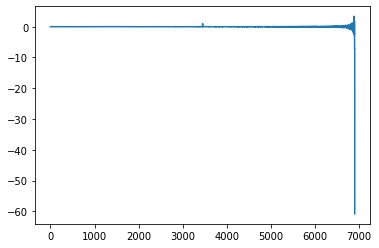

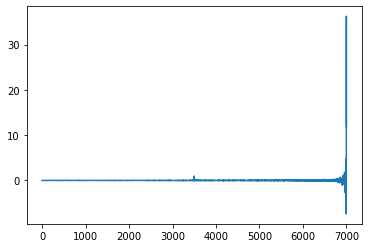

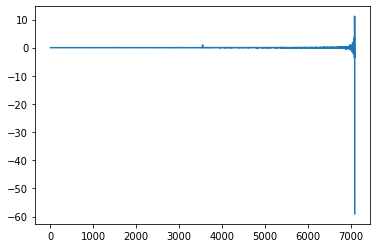

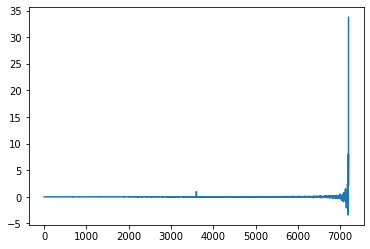

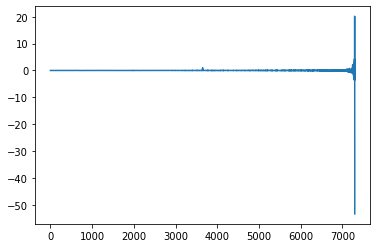

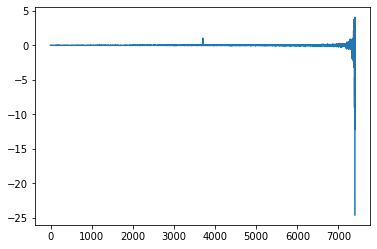

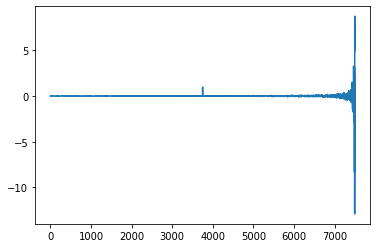

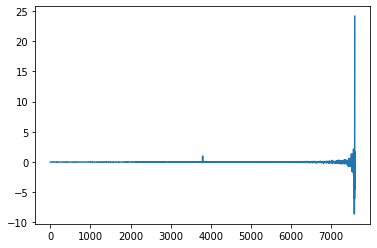

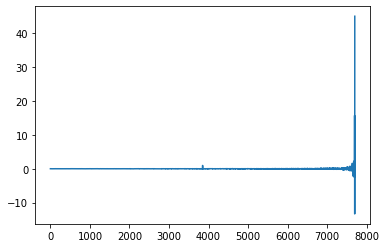

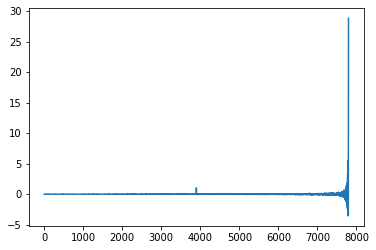

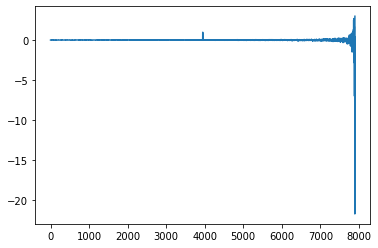

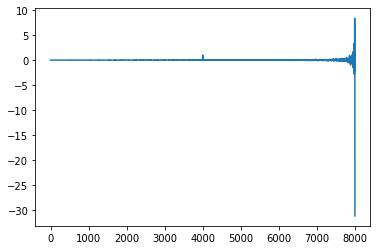

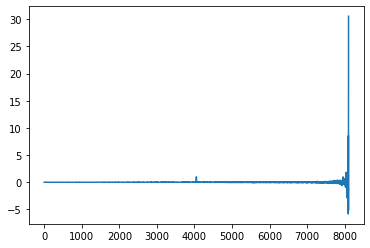

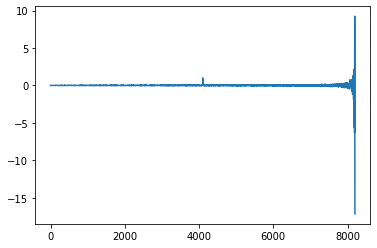

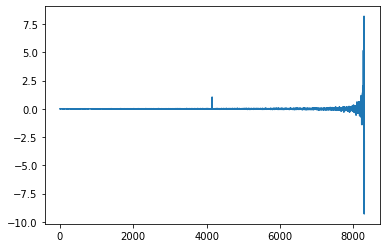

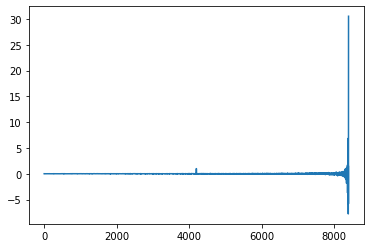

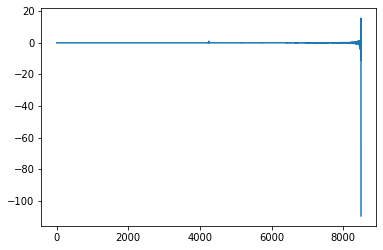

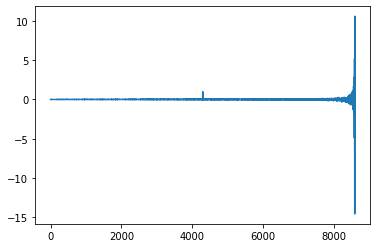

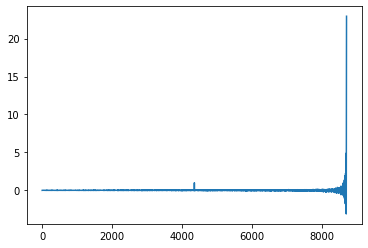

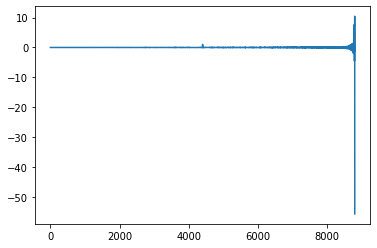

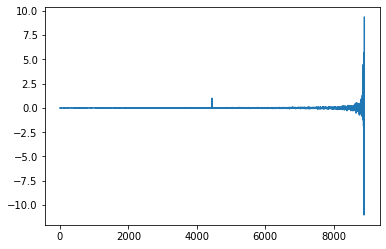

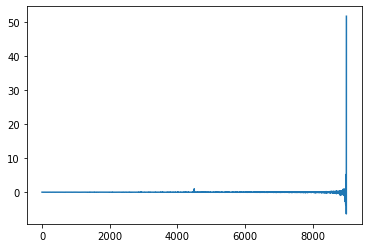

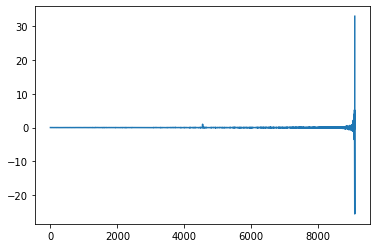

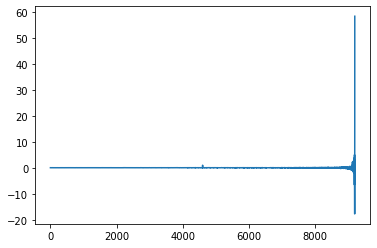

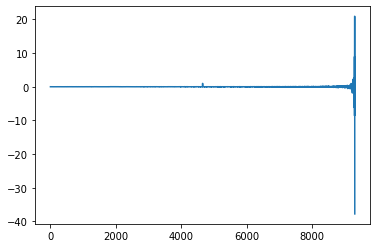

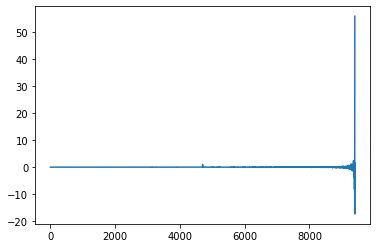

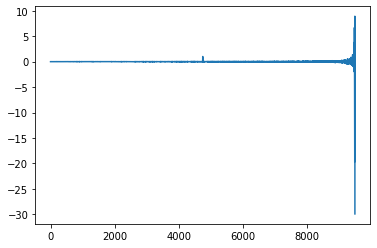

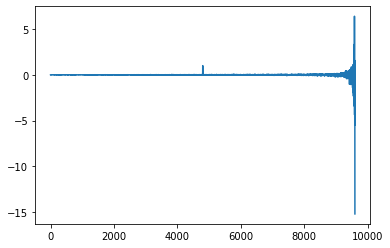

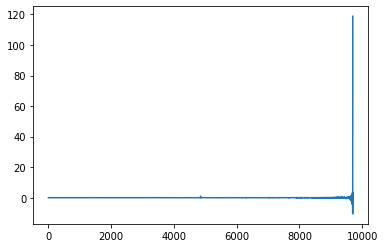

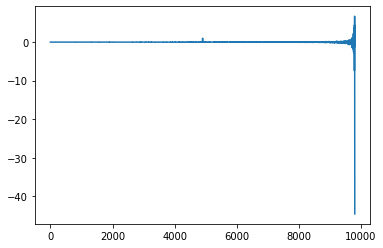

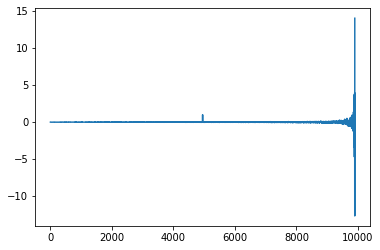

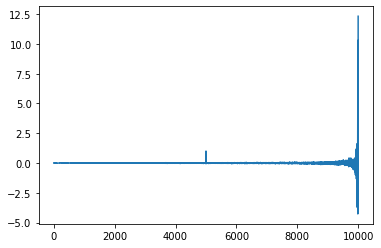

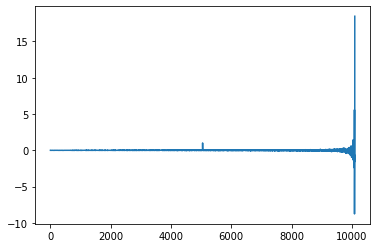

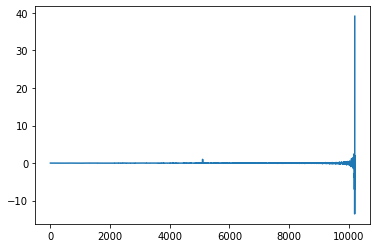

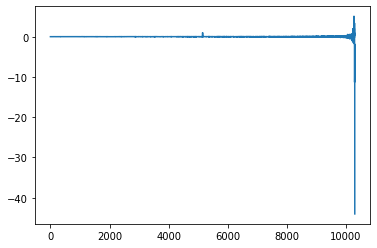

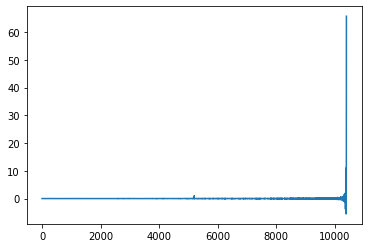

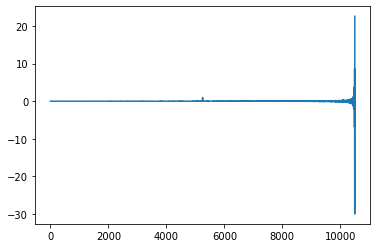

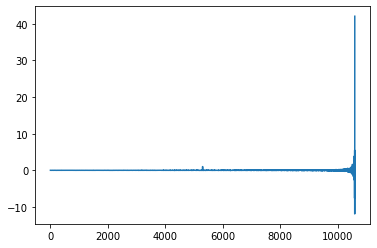

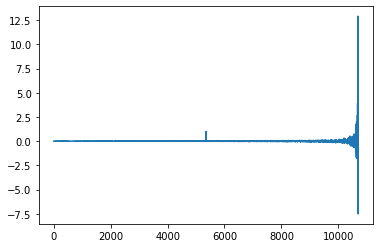

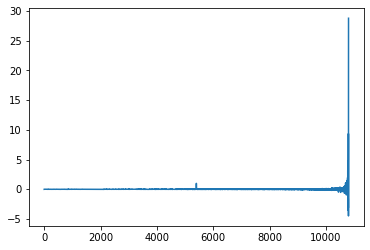

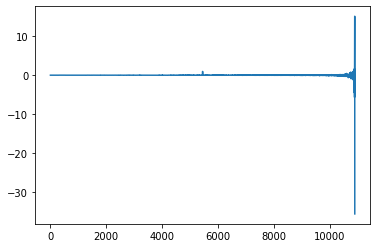

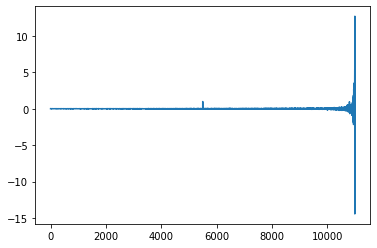

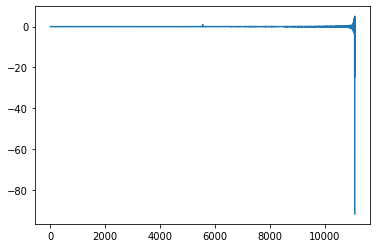

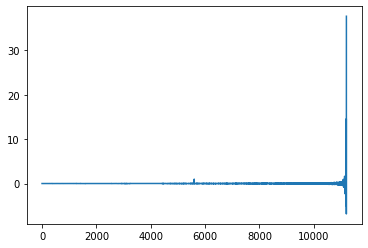

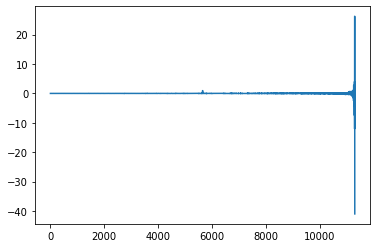

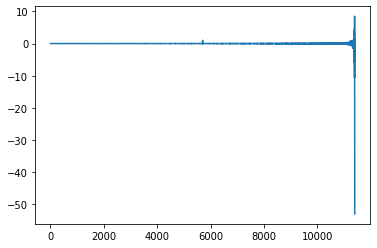

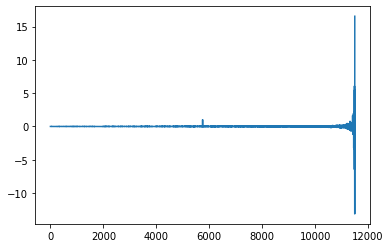

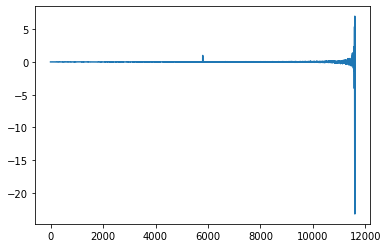

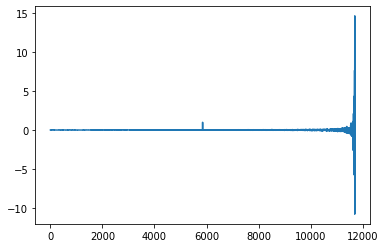

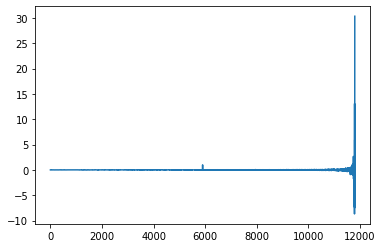

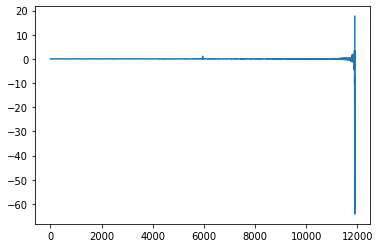

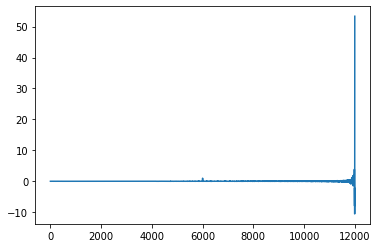

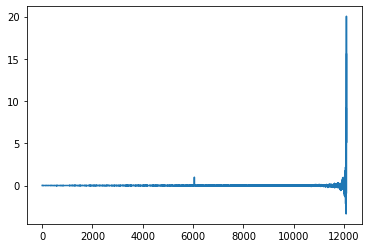

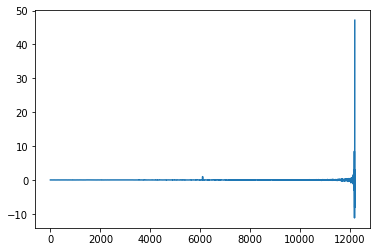

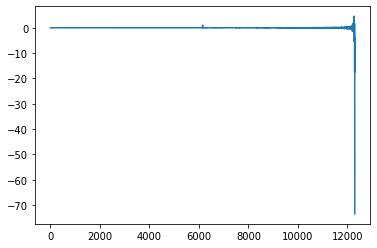

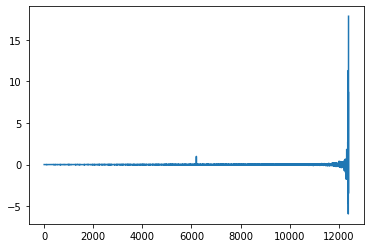

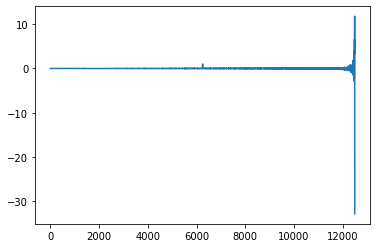

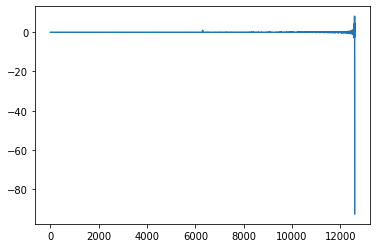

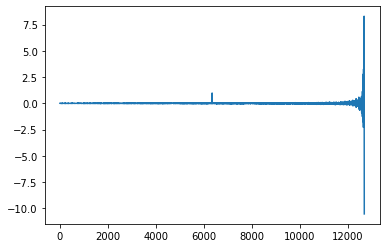

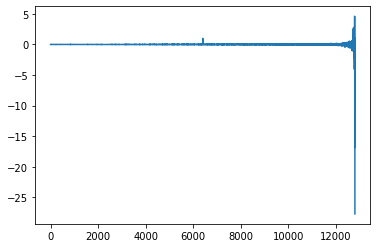

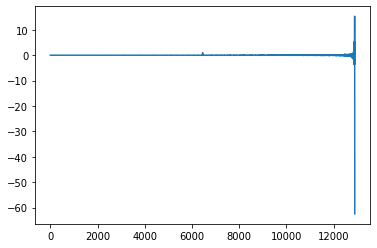

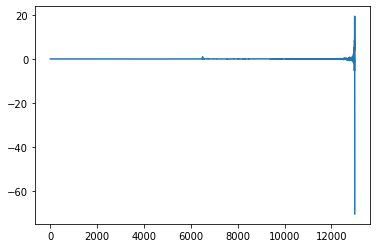

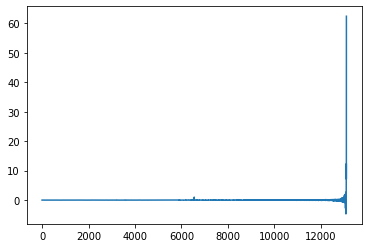

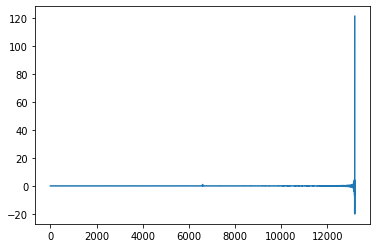

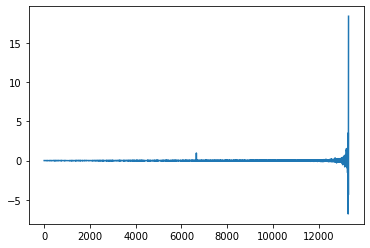

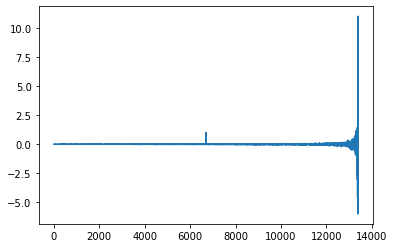

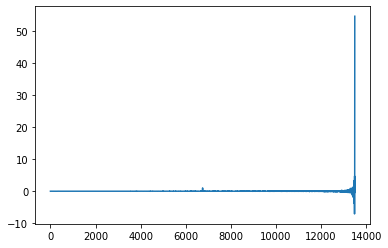

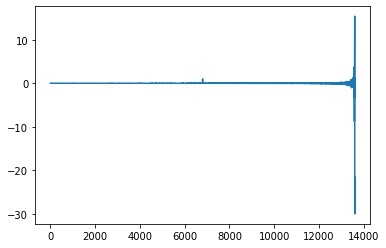

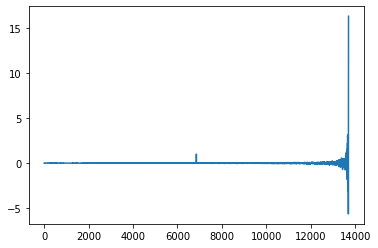

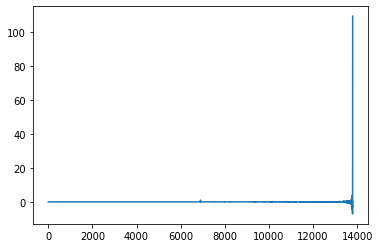

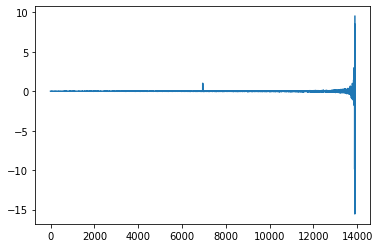

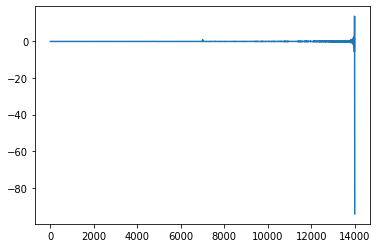

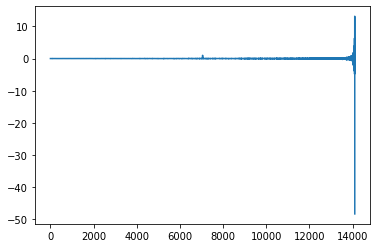

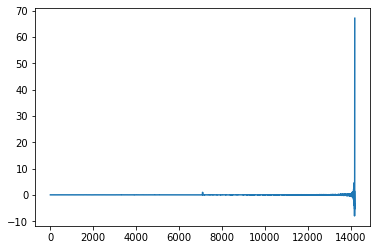

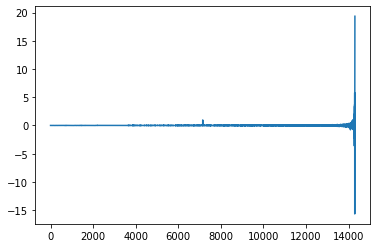

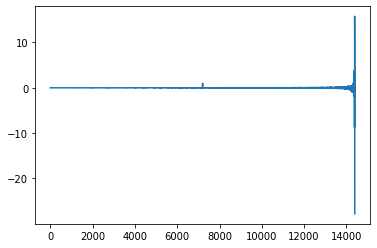

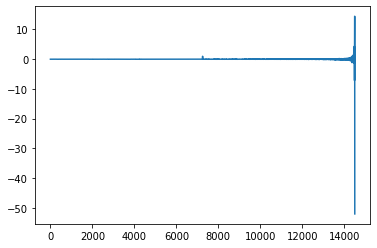

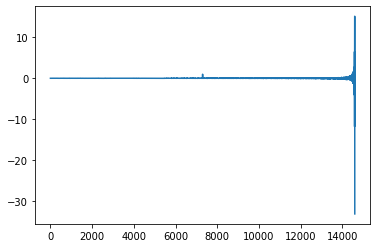

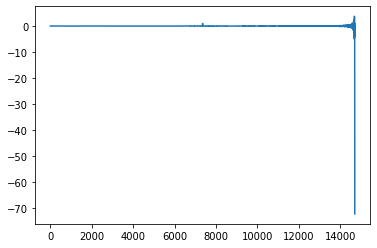

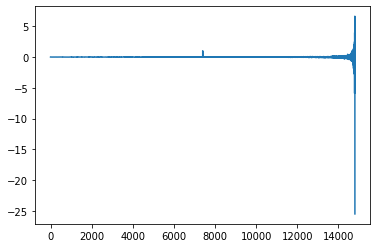

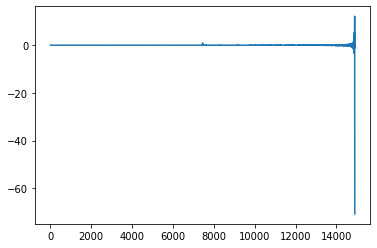

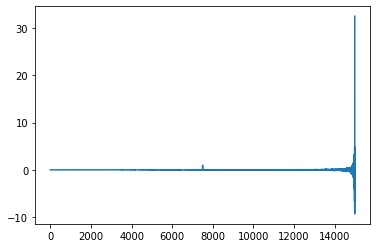

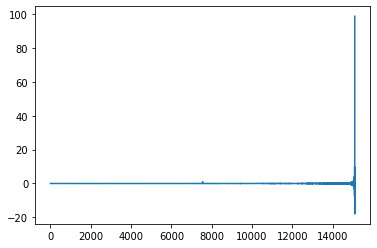

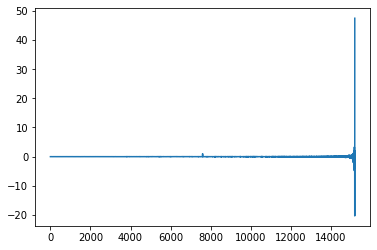

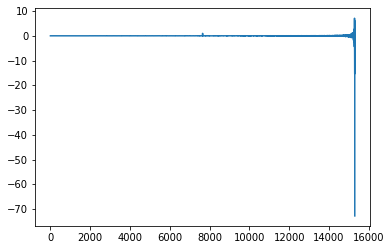

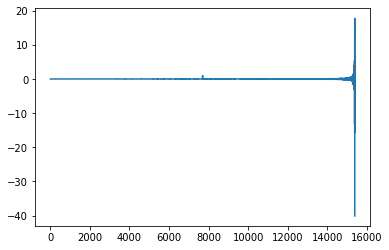

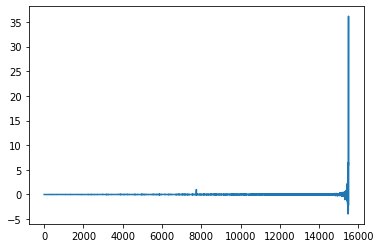

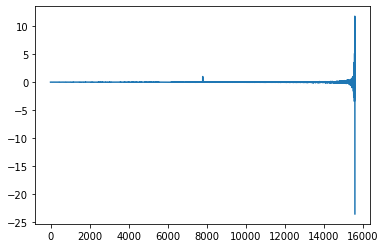

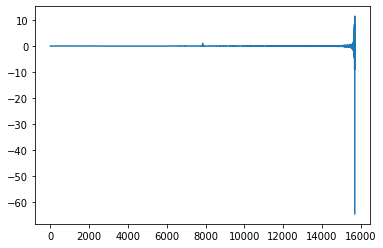

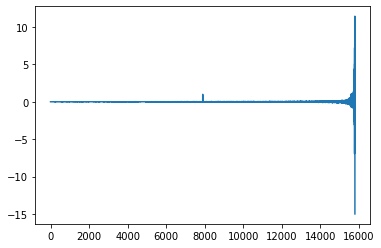

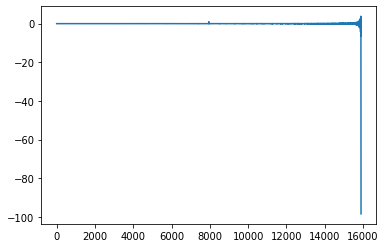

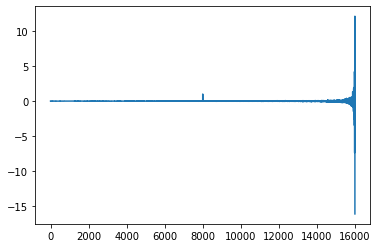

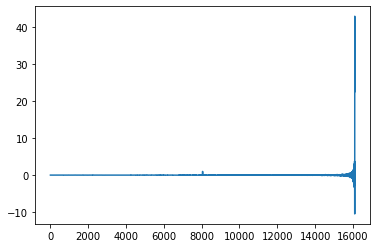

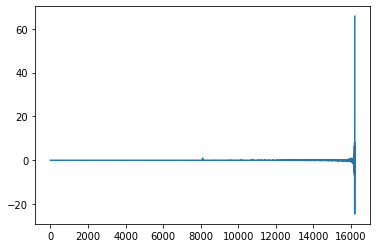

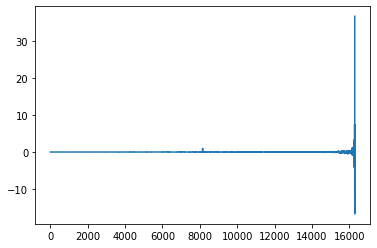

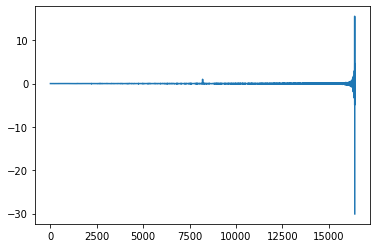

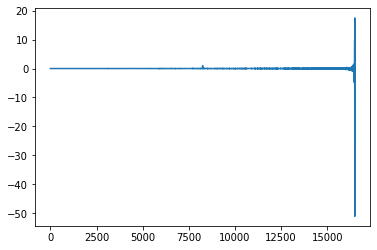

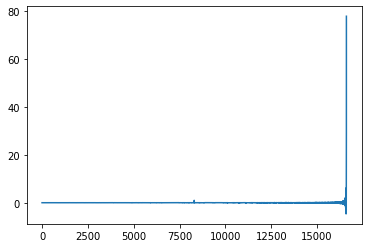

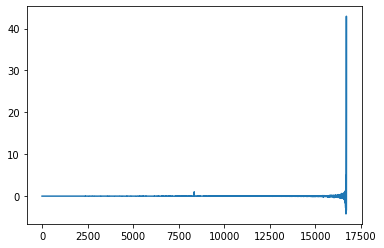

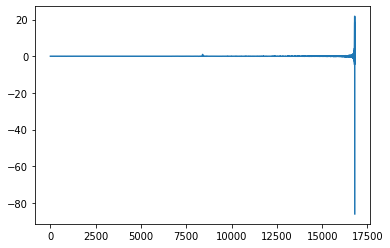

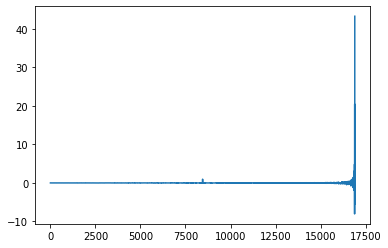

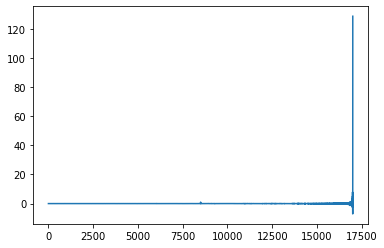

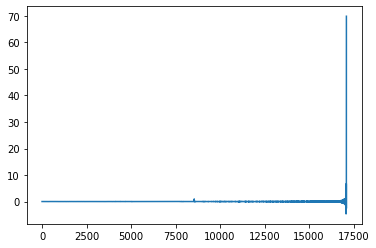

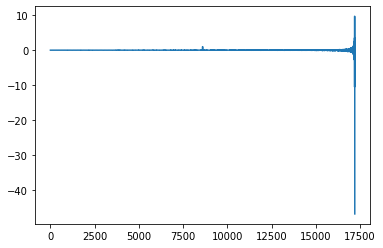

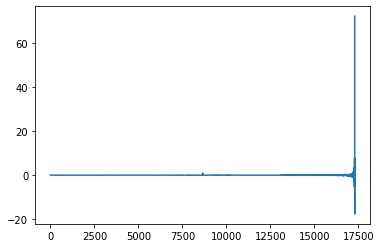

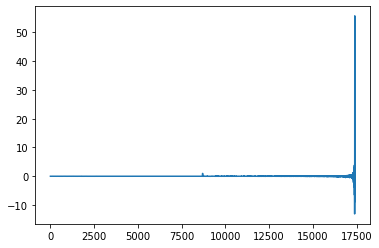

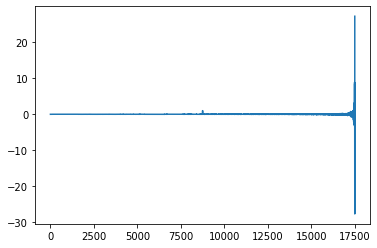

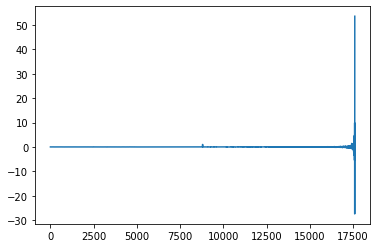

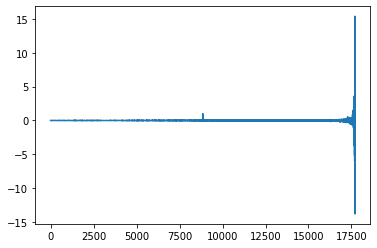

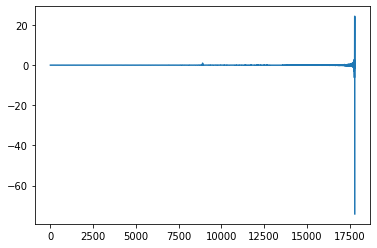

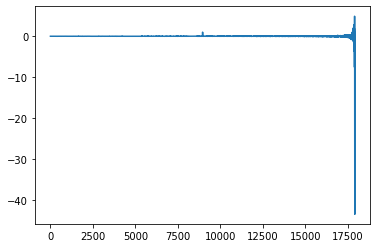

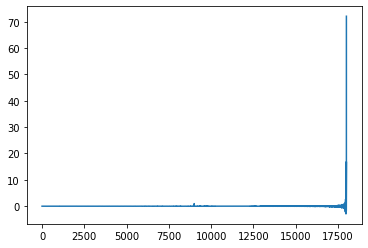

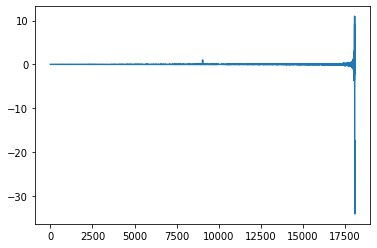

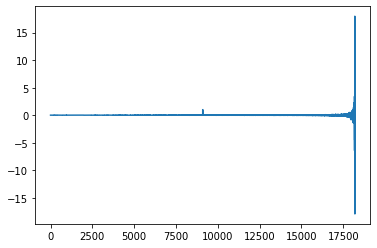

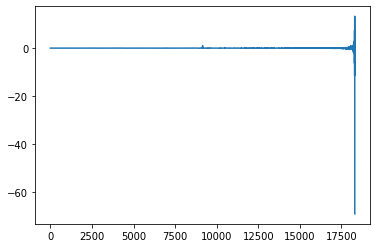

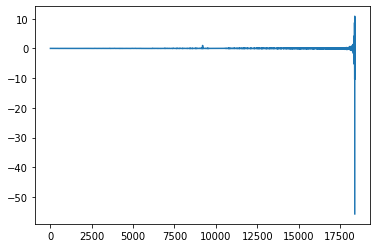

<Figure size 432x288 with 0 Axes>

In [ ]:
# Inicializar listas
var_S_Y_hat = list()
var_S_Y_Barlett = list()
var_S_Y_Welch = list()

# Definimos largo del fragmento a ser usado en Barlett y Welch
L = 100

N_vector = np.arange(100, 20000, L)
K_vector = N_vector / L
K_vector = K_vector.astype('int')

for N in N_vector:
  X_n = np.random.normal(media, dev_std, size=N)

  # Sistema LTI
  Y_n = np.zeros_like(X_n, dtype='float64')
  for n in range(1, N):
    Y_n[n] = 0.5 * X_n[n] + 0.5 * X_n[n - 1]

  # Periodograma "Normal" Salida LTI
  Y_w = fft(Y_n)
  S_Y_hat = (1/N) * np.abs(Y_w)**2
  var_S_Y_hat.append(np.var(S_Y_hat))
  # print("Varianza de S_y estimado: {}".format(var_S_Y_hat))

  # Correlograma
  Suma_Correlacion_Y = np.correlate(Y_n, Y_n, "same")
  # Autocorrelacion Sesgada
  R_Y_hat_sesgado = Suma_Correlacion_Y/N
  Correlograma_Y_sesgado = fft(R_Y_hat_sesgado)
  # Autocorrelacion Insesgada
  c_w = np.zeros(N, dtype="float64")
  for K2 in range(0, N):
    c_w[K2] = 1/(N-K2)
  R_Y_hat_insesgado = c_w * Suma_Correlacion_Y
  Correlograma_Y_insesgado = fft(R_Y_hat_insesgado)

  # Periodograma de Bartlett
  K = int(N/L)
  Mat_Sy_Barlett = np.zeros((K, L))
  for k in range(0, K):
    # Fragmentando la señal
    idx1 = int(k*L)
    idx2 = int((k+1)*L)
    # print("k:{}/{} -> idx1: {}, idx2:{}".format(k, K, idx1, idx2))
    Y_w = fft(Y_n[idx1:idx2])
    # Periodograma del fragmento
    S_Y_hat_fragmento = (1/L) * np.abs(Y_w)**2
    # Guardamos el periodograma en la matriz
    Mat_Sy_Barlett[k,:] = S_Y_hat_fragmento.copy()
  # Promedio de cada columna
  S_Y_Barlett = np.mean(Mat_Sy_Barlett, axis=0)
  # Guardamos
  var_S_Y_Barlett.append(np.var(S_Y_Barlett))

  # Periodograma de Welch
  # Solapamos el 50% -> Implica el doble de K respecto de Barlett
  K = int(2*N/L)
  Mat_Sy_Welch = np.zeros((K, L))
  for k in range(0, K):
    # Fragmentando la señal
    idx1 = int(k*L/2)
    idx2 = int(((k/2)+1)*L)
    # print("k:{}/{} -> idx1: {}, idx2:{}".format(k, K, idx1, idx2))
    # Comprobamos que no se termine la senal antes que la longitud del fragmento
    if idx2 > Y_n.shape[0]:
      continue
    Y_w = fft(Y_n[idx1:idx2])
    # Periodograma del fragmento
    S_Y_hat_fragmento = (1/L) * np.abs(Y_w)**2
    # Guardamos el periodograma en la matriz
    Mat_Sy_Welch[k,:] = S_Y_hat_fragmento.copy()
  # Promedio de cada columna
  S_Y_Welch = np.mean(Mat_Sy_Welch, axis=0)
  # Guardamos
  var_S_Y_Welch.append(np.var(S_Y_Welch))


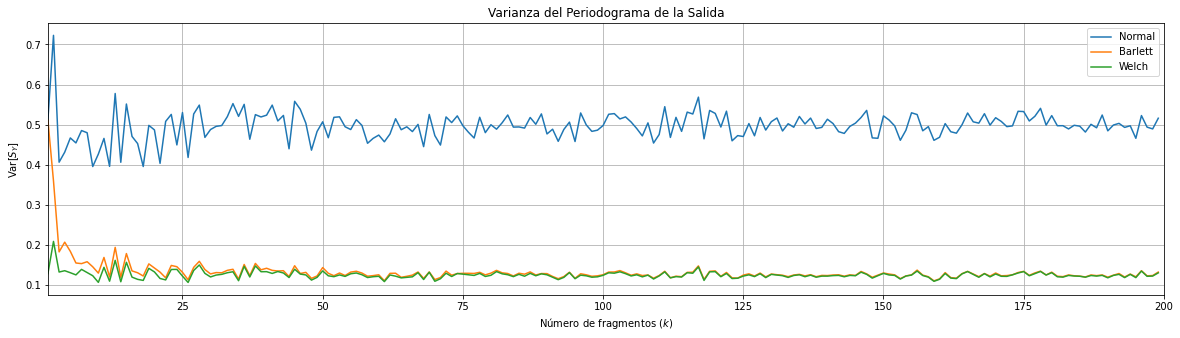

In [ ]:
# Graficamos evolución de la varianza según el número de fragmentos en k
fig, axs = plt.subplots(figsize=(20, 5))
axs.plot(K_vector, var_S_Y_hat, K_vector, var_S_Y_Barlett, K_vector, var_S_Y_Welch)
axs.set_title('Varianza del Periodograma de la Salida')
axs.set_ylabel('Var[$S_Y$]')
axs.set_xlabel('Número de fragmentos $(k)$')
axs.set_xlim(1, K_vector.max()+1)
axs.grid(True)
axs.legend(['Normal', 'Barlett', 'Welch']);

plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


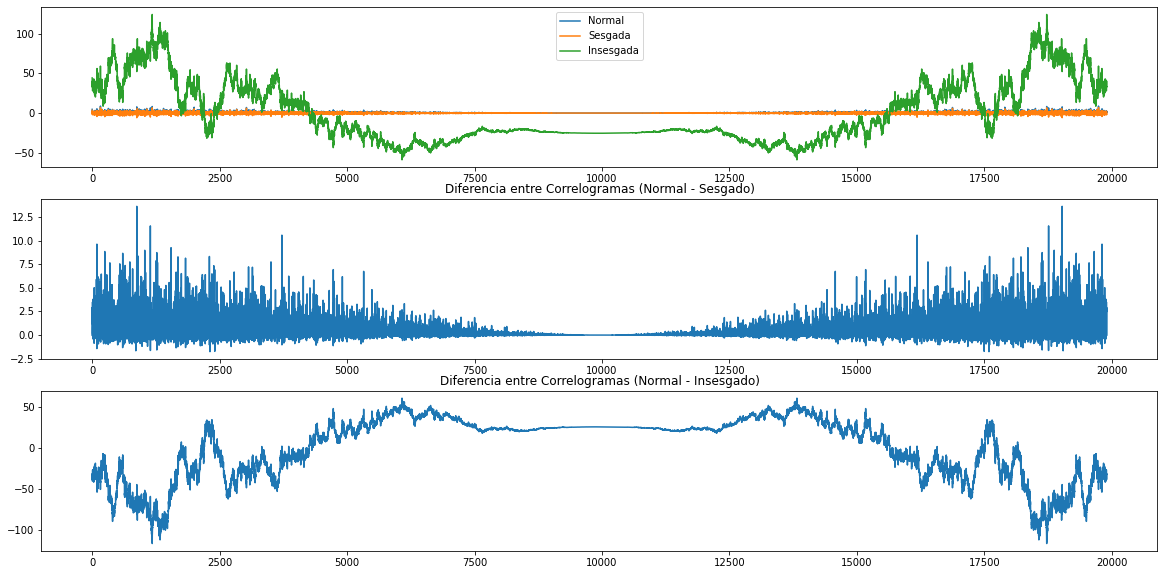

In [ ]:
# Graficamos 
fig, axs = plt.subplots(nrows=3, ncols=1,figsize=(20, 10))
axs[0].plot(S_Y_hat)
axs[0].plot(Correlograma_Y_sesgado)
axs[0].plot(Correlograma_Y_insesgado)
axs[0].legend(['Normal', 'Sesgada', 'Insesgada'])
# axs.set_title('Varianza del Periodograma de la Salida')
# axs.set_ylabel('Var[$S_Y$]')
# axs.set_xlabel('Número de fragmentos $(k)$')
# axs.set_xlim(2450, 2550)
# axs.grid(True)

axs[1].plot(S_Y_hat - Correlograma_Y_sesgado)
axs[1].set_title('Diferencia entre Correlogramas (Normal - Sesgado)')

axs[2].plot(S_Y_hat - Correlograma_Y_insesgado)
axs[2].set_title('Diferencia entre Correlogramas (Normal - Insesgado)')


plt.show()